# Tutorial 2 
Let's build a simple application that plots a Gaussian (Normal) distribution with some input from the user.
We can start by re-using the code from the previous tutorial to build a simple GUI with a single Label for now.

In [10]:
from tkinter import Tk, Label

# Organise your GUI code by creating a class
class PlotNormalGUI:
    def __init__(self, main):

        # Main window
        self.main = main
        
        # Add Label widget (displays text)
        self.label = Label(main, text = "Normal Distribution")
        self.label.pack()

# Create the top-level window using Tk()
root = Tk()
my_gui = PlotNormalGUI(root)
root.mainloop()

<img src="images/Image6.PNG" alt="Output of previous cell" />

Now let's add widgets, one for the user to choose the *n* (number of points), and two for the the mean and the standard deviation, respectively, of the distribution.
Starting by adding the spin box to choose *n*. Spinbox is a widget that receives information from the user. We can create a variable object, in this case StringVar(), to store that information. We then use the method .get() to retrieve the information from the widget.

In [11]:
# Import more functionality from the Tkinter module
from tkinter import *

class PlotNormalGUI:
    def __init__(self, main):

        self.main = main
        
        self.label = Label(main, text = "Normal Distribution")
        self.label.pack()

        # Add Spinbox to choose the number of observations in the distribution 
        # (the property from_ has an underscore because from is a protected name in Python)
        points = StringVar()
        self.spinbox = Spinbox(main, from_= 1, to = 1000, textvariable = points)
        self.spinbox.pack()

root = Tk()
my_gui = PlotNormalGUI(root)
root.mainloop()

<img src="images/Image7.PNG" alt="Output of previous cell" />

Let's continue adding the other widgets. Now changing from the pack() geometry management method to the grid() geometry method in order to arrange the widgets in a two-dimensional table. Entry widgets can be used to allow the user to enter a single line of text (in our case the mean and standard deviation of the distribution).

In [90]:
from tkinter import *

class PlotNormalGUI:
    def __init__(self, main):

        self.main = main
        
        # Change from pack to grid method 
        self.label_title = Label(main, text="Normal Distribution")
        self.label_title.grid(row = 0, column = 0, columnspan = 2)

        # Add Label widget for n
        self.label_n = Label(main, text = "Number of observation, n")
        self.label_n.grid(row = 1, column = 0)

        # Add Spinbox to choose the number of observations in the distribution, n 
        points = StringVar()
        self.spinbox = Spinbox(main, from_= 1, to = 1000, textvariable = points)
        self.spinbox.grid(row = 2, column = 0)

        # Add Button for the user to press to display the distribution
        self.button = Button(main, text = "Plot Normal Distribution")
        self.button.grid(row = 2, column = 1)

        # Add Label widget for the mean
        self.label_mean = Label(main, text = "Mean")
        self.label_mean.grid(row = 3, column = 0)
        
        # Add Entry to input value for the mean
        self.entry_mean = Entry(main)
        self.entry_mean.grid(row = 4, column = 0)

        # Add Label widget for the standard distribution
        self.label_std = Label(main, text = "Standard deviation")
        self.label_std.grid(row = 3, column = 1)

        # Add Entry to input value for the standard deviation
        self.entry_std = Entry(main)
        self.entry_std.grid(row = 4, column = 1)

root = Tk()
my_gui = PlotNormalGUI(root)
root.mainloop()

<img src="images/Image8.PNG" alt="Output of previous cell" width = 300 />

We have a lot of widgets in a single window. It might be good to organise them using an organisational widget called Frame. Frames allow one to group different widgets together. We can use one placement management method for the frames, and inside each frame we can use a different placement method. In this example, we will add two frames, one for all the entry boxes and buttons, and one for the plot. The frames are going to be placed using the pack() method, whilst inside the first frame we will use the grid() method to organise the widgets.

In [91]:
# Import ttk to create Frames
from tkinter import *
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt

class PlotNormalGUI:
    def __init__(self, main):

        self.main = main

        # Create first Frame to group all the widgets together
        # Use the pack method to place Frame in the main Window
        self.frame_menu = ttk.Frame(main)
        self.frame_menu.config(padding = (20,10))
        self.frame_menu.pack()
        
        self.label_title = Label(self.frame_menu, text="Normal Distribution")
        self.label_title.grid(row = 0, column = 0, columnspan = 2)

        self.label_n = Label(self.frame_menu, text = "Number of observation, n")
        self.label_n.grid(row = 1, column = 0)

        points = StringVar()
        self.spinbox = Spinbox(self.frame_menu, from_= 1, to = 1000, textvariable = points)
        self.spinbox.grid(row = 2, column = 0)

        self.button = Button(self.frame_menu, text = "Plot Normal Distribution")
        self.button.grid(row = 2, column = 1)

        self.label_mean = Label(self.frame_menu, text = "Mean")
        self.label_mean.grid(row = 3, column = 0)
        
        self.entry_mean = Entry(self.frame_menu)
        self.entry_mean.grid(row = 4, column = 0)

        self.label_std = Label(self.frame_menu, text = "Standard deviation")
        self.label_std.grid(row = 3, column = 1)

        self.entry_std= Entry(self.frame_menu)
        self.entry_std.grid(row = 4, column = 1)

        # Create second Frame to display the plot
        # Use the pack method to place Frame in the main Window
        # Without the plot this Frame will not show
        self.frame_plot = ttk.Frame(main)
        self.frame_plot.config(padding=(2,10))
        self.frame_plot.pack()

root = Tk()
my_gui = PlotNormalGUI(root)
root.mainloop()

<img src="images/Image9.PNG" alt="Output of previous cell" width = 300 />

Before we add the actual functionality to the widgets, let's define a utility function to create the plot we would like to show.

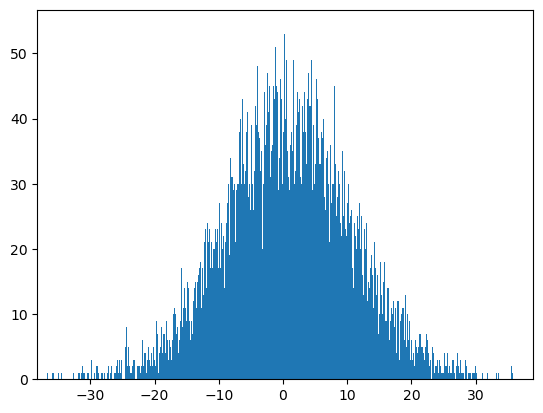

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Utility function to plot histogram of random numbers
def plot_distribution(input_mean, input_std, input_n):

    # Generate random numbers using mean, standard deviation and number of points
    x = np.random.normal(input_mean, input_std, input_n)

    # Create bins for histogram
    x_low = x.min()
    x_high = x.max()
    bins = np.arange(x_low, x_high, 0.1)

    # Create histogram 
    f, ax = plt.subplots()
    ax.clear()
    ax.hist(x, bins)
    ax.set_xlim(x_low, x_high)

# Plot example distribution
input_mean = 0.6
input_std = 10
input_n = 10000
plot_distribution(input_mean, input_std, input_n)

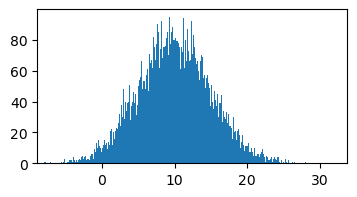

In [99]:
# Add additional modules needed for plotting
from tkinter import *
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class PlotNormalGUI:
    def __init__(self, main):

        self.main = main

        self.frame_menu = ttk.Frame(main)
        self.frame_menu.config(padding = (20,10))
        self.frame_menu.pack()
        
        self.label_title = Label(self.frame_menu, text="Normal Distribution")
        self.label_title.grid(row = 0, column = 0, columnspan = 2)

        self.label_n = Label(self.frame_menu, text = "Number of observation, n")
        self.label_n.grid(row = 1, column = 0)

        points = StringVar()
        self.spinbox = Spinbox(self.frame_menu, from_= 1, to = 1000, textvariable = points)
        self.spinbox.grid(row = 2, column = 0)

        # Add functionality to the button using the command property,
        # instructing the button to call the function plot_dist
        self.button = Button(self.frame_menu, text = "Plot Normal Distribution", command = self.plot_dist)
        self.button.grid(row = 2, column = 1)

        self.label_mean = Label(self.frame_menu, text = "Mean")
        self.label_mean.grid(row = 3, column = 0)
        
        self.entry_mean = Entry(self.frame_menu)
        self.entry_mean.grid(row = 4, column = 0)

        self.label_std = Label(self.frame_menu, text = "Standard deviation")
        self.label_std.grid(row = 3, column = 1)

        self.entry_std= Entry(self.frame_menu)
        self.entry_std.grid(row = 4, column = 1)

        self.frame_plot = ttk.Frame(main)
        self.frame_plot.config(padding=(2,10))
        self.frame_plot.pack()

        # Figure
        f, ax = plt.subplots(figsize=(4,2))
        ax.axis('off')
        self.a = ax
        self.canvas = FigureCanvasTkAgg(f, self.frame_plot)
        self.canvas.draw()
        self.canvas._tkcanvas.pack()

    # Add plotting method that we defined in the previous cell
    def plot_dist(self):

        # Read values from Entry boxes and spinbox
        self.input_mean = self.entry_mean.get()
        self.input_std = self.entry_std.get()
        self.input_n = self.spinbox.get()
        
        # Generate random numbers using mean, standard deviation and number of points
        x = np.random.normal(float(self.input_mean), float(self.input_std), int(self.input_n))

        # Create bins for histogram
        x_low = x.min()
        x_high = x.max()
        bins = np.arange(x_low, x_high, 0.1)

        # Create histogram 
        self.a.clear()
        self.a.hist(x, bins)
        self.a.set_xlim(x_low, x_high)
        self.a.axis('on')
        self.canvas.draw()

root = Tk()
my_gui = PlotNormalGUI(root)
root.mainloop()